# Import Libraries

In [1]:
####
## TensorFlow Imports
####

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD, Adam

###
## Anther pip Imports
###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-12-11 13:20:19.076589: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 13:20:19.898509: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 13:20:22.231549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 13:20:22.231619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 13:20:23.951580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# Making a sympathic Datas set

they allow us carefully to study the behavour of our model under differnt control currecumistances ,

1.   By Generating a series of data using sign wave
2.   Genereating the Data set based on the series data

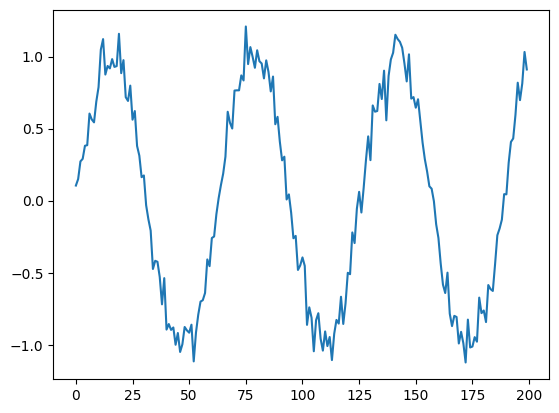

In [2]:
# make the orginal Data:

series = np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1

#plot it

plt.plot(series)
plt.show();


In [12]:
####
## Building the Dataset
# let us see if we can use T past values to predict the next value
###############


# length of the series
T = 10

# Declare X, Y as lists to convert them to arrays later.
X = []
Y = []

#print("range(len(series)", range(len(series))) # 200


for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)

N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

print("N", N)

X.shape (190, 10) Y.shape (190,)
N 190


In [13]:
X[:-N//2]

array([[ 0.10483647,  0.15007839,  0.27226739,  0.29028853,  0.38083547,
         0.38494235,  0.60432319,  0.56374374,  0.54326513,  0.68681451],
       [ 0.15007839,  0.27226739,  0.29028853,  0.38083547,  0.38494235,
         0.60432319,  0.56374374,  0.54326513,  0.68681451,  0.78775798],
       [ 0.27226739,  0.29028853,  0.38083547,  0.38494235,  0.60432319,
         0.56374374,  0.54326513,  0.68681451,  0.78775798,  1.0475144 ],
       [ 0.29028853,  0.38083547,  0.38494235,  0.60432319,  0.56374374,
         0.54326513,  0.68681451,  0.78775798,  1.0475144 ,  1.12081175],
       [ 0.38083547,  0.38494235,  0.60432319,  0.56374374,  0.54326513,
         0.68681451,  0.78775798,  1.0475144 ,  1.12081175,  0.8751081 ],
       [ 0.38494235,  0.60432319,  0.56374374,  0.54326513,  0.68681451,
         0.78775798,  1.0475144 ,  1.12081175,  0.8751081 ,  0.93448723],
       [ 0.60432319,  0.56374374,  0.54326513,  0.68681451,  0.78775798,
         1.0475144 ,  1.12081175,  0.8751081 

In [6]:
#### try auto-regressive linear model
####################3

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

### train the RNN

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 58ms/step - loss: 0.7261 - val_loss: 0.3429
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.6018 - val_loss: 0.3094
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1520 - val_loss: 0.0895
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1878 - val_loss: 0.2049
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1948 - val_loss: 0.0399
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0497 - val_loss: 0.1298
Epoch 7/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1354 - val_loss: 0.0783
Epoch 8/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0574 - val_loss: 0.0455
Epoch 9/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0698 - val_loss: 0.0871
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0623 - val_loss: 0.0304
Epoch 11/80
3/3 [============

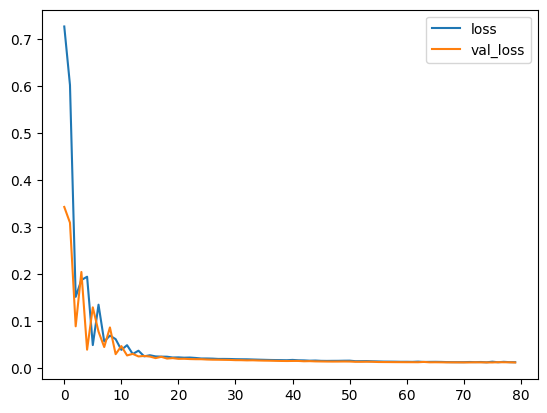

In [7]:
# Plotting loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [8]:
### "Wrong" Forcasting using targets

validation_target = Y[-N//2:]
validation_predictions= []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] ### 1 x 1 array -> scalar
  i += 1
  #update the prediction list
  validation_predictions.append(p)


1/1 [==============================] - 0s 15ms/step


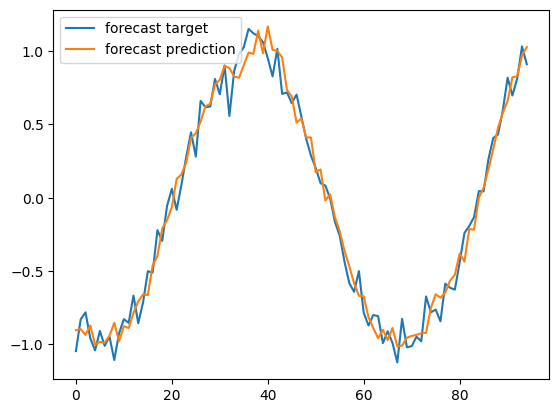

In [9]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

In [10]:
# Forecast future values ( use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] # 1x1 array -> scalar
  #update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 17ms/step


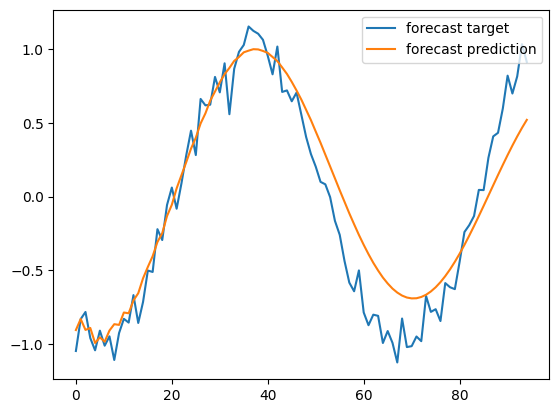

In [11]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();